<a href="https://colab.research.google.com/github/gcontrerasx/Ciencia-de-Datos-y-ML-con-Python/blob/main/M2_Proyecto_No_3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto No. 3.
#5 de mayo 2023.

#Estadística descriptiva y EDA.

-------------------



#German Contreras Jacinto.
#Jeerson Antonio Maradiaga.
#Katherine Serrano Morales.


-------------------
Generar nuevas variables de valor (De ser necesario)
1er notebook: Análisis Exploratorio de datos (EDA) - Estadística
Descriptiva; Incluir la generación de nuevas variables de valor.


#Lectura de datos

In [ ]:
# instalamos
!pip install statistics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7453 sha256=359d0519507132a8a1a57bc63cb12171980c28d18d7d0c6ef471073b363bc262
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built statistics


In [ ]:
#cargamos las librerias
import pandas as pd
import seaborn as sns
import statistics as stats # estadística
import numpy as np
import scipy

import matplotlib.pyplot as plt

In [ ]:
#cargamos la data desde Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Subimos a un DataFrame

df = pd.read_excel('/content/drive/MyDrive/Data - DATA & ANALYTICS/Data_Nutricion_grupos.xlsx', sheet_name="Hoja1")

df = df.drop(df.columns[[0]], axis='columns')

df.head()

talla  edad  peso_kg  circun_cuello        IMC  circun_cintura  cadera  \
0  155.7  16.0     71.2           35.7  29.576170            90.0    98.0   
1  166.5  16.0     61.0           31.8  22.364707            80.9   100.5   
2  151.3  16.0     49.1           30.5  21.623567            72.0    86.0   
3  151.7  16.0     54.6           32.6  23.117479             NaN    88.4   
4  160.3  16.0     58.0           30.1  22.260196             NaN    97.9   

   ind_cintura_cadera  ind_cintura_estatura  por_grasa_corporal  \
0            0.918367              0.578035           36.446202   
1            0.804975              0.485886           28.790714   
2            0.837209              0.475876           29.867419   
3            0.841629              0.490442           27.867640   
4            0.813075                   NaN           30.276688   

   masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  pliegue_cutaneo_TRICEPS  \
0               45.250304                    13.0                     27.0   
1               43.437664                     5.0                     19.0   
2               34.435097                    13.0                     18.0   
3               39.384269                     5.0                     19.0   
4               40.439521                    10.0                     19.0   

   pliegue_cutaneo_ESCAPULAR  pliegue_cutaneo_SUPRAILIACO Grupos  
0                       32.0                         34.0      A  
1                       15.0                         22.0      A  
2                       18.0                         17.0      A  
3                       15.0                         18.0      A  
4                       20.0                         19.0      A

#Tratamiento de datos

In [ ]:
#Lectura de nombres de columnas, nos servira más adelante para escoger las columnas tipo FLOAT
columns_names = df.columns.values
columns_names

array(['talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC',
       'circun_cintura', 'cadera', 'ind_cintura_cadera',
       'ind_cintura_estatura', 'por_grasa_corporal',
       'masa_corporal_magra_kg', 'pliegue_cutaneo_BICEPS',
       'pliegue_cutaneo_TRICEPS', 'pliegue_cutaneo_ESCAPULAR',
       'pliegue_cutaneo_SUPRAILIACO', 'Grupos'], dtype=object)

In [ ]:
df.info()  # información detallada de las variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        624 non-null    float64
 1   edad                         645 non-null    float64
 2   peso_kg                      629 non-null    float64
 3   circun_cuello                623 non-null    float64
 4   IMC                          640 non-null    float64
 5   circun_cintura               637 non-null    float64
 6   cadera                       647 non-null    float64
 7   ind_cintura_cadera           639 non-null    float64
 8   ind_cintura_estatura         636 non-null    float64
 9   por_grasa_corporal           650 non-null    float64
 10  masa_corporal_magra_kg       648 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

In [ ]:
#Cantidad de datos: columnas y filas
print("La cantidad de columnas en los datos es: ",df.shape[1])
print("La cantidad de filas en los datos es: ",df.shape[0])

La cantidad de columnas en los datos es:  16
La cantidad de filas en los datos es:  652


In [ ]:
# Verificamos los duplicados
df.duplicated().sum()

0

In [ ]:
# Revisamos los datos perdidos

df.isna().sum()

talla                          28
edad                            7
peso_kg                        23
circun_cuello                  29
IMC                            12
circun_cintura                 15
cadera                          5
ind_cintura_cadera             13
ind_cintura_estatura           16
por_grasa_corporal              2
masa_corporal_magra_kg          4
pliegue_cutaneo_BICEPS          0
pliegue_cutaneo_TRICEPS         0
pliegue_cutaneo_ESCAPULAR       0
pliegue_cutaneo_SUPRAILIACO     0
Grupos                          0
dtype: int64

In [ ]:
#variables cualitativas
#var_str = ["Grupos"]
#df[var_str] = df[var_str].astype(str)

#df["Grupos"] = df["Grupos"].astype(str)
#df.info()

var_nutricion_cat =df.loc[:,"Grupos"]
var_nutricion_cat.head()

0    A
1    A
2    A
3    A
4    A
Name: Grupos, dtype: object

In [ ]:
# seleccionamos las columnas numéricas
var_nutricion_num = df.loc[:, ['talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC',
       'circun_cintura', 'cadera', 'ind_cintura_cadera',
       'ind_cintura_estatura', 'por_grasa_corporal',
       'masa_corporal_magra_kg', 'pliegue_cutaneo_BICEPS',
       'pliegue_cutaneo_TRICEPS', 'pliegue_cutaneo_ESCAPULAR',
       'pliegue_cutaneo_SUPRAILIACO'] ]
var_nutricion_num.head(20)

talla  edad  peso_kg  circun_cuello        IMC  circun_cintura  cadera  \
0   155.7  16.0     71.2           35.7  29.576170            90.0    98.0   
1   166.5  16.0     61.0           31.8  22.364707            80.9   100.5   
2   151.3  16.0     49.1           30.5  21.623567            72.0    86.0   
3   151.7  16.0     54.6           32.6  23.117479             NaN    88.4   
4   160.3  16.0     58.0           30.1  22.260196             NaN    97.9   
5   162.4  16.0     70.8           33.9  26.124451            86.5   106.1   
6   167.0  16.0     47.4           30.5  17.318656            66.7    81.5   
7   158.7  16.0     49.3           31.2  18.979031            69.3    83.2   
8   158.2  16.0     91.0           37.5  35.521296           107.5   116.0   
9   171.0  16.0     50.4           30.8  17.543860            66.0    80.0   
10  135.6  15.0     34.3           30.9  18.436578            64.0    72.5   
11  158.9  16.0      NaN           31.5  20.040231            72.0    84.5   
12  162.1  16.0      NaN           31.5  19.827671            66.7    79.5   
13  166.7  16.0      NaN           30.8  18.712514            75.4    81.6   
14  158.2  16.0      NaN           30.5  22.295707            78.0    90.0   
15  160.3  16.0     74.3           34.7  28.408991            94.0   107.5   
16  169.3  16.0     52.1           31.3  18.770177            68.0    82.0   
17    NaN  15.0     44.5           31.2  18.516703            69.0    85.1   
18    NaN  17.0     58.6           33.9  23.396507            73.0    86.0   
19    NaN  16.0     84.5           37.0  36.708603           107.0   119.0   

    ind_cintura_cadera  ind_cintura_estatura  por_grasa_corporal  \
0             0.918367              0.578035           36.446202   
1             0.804975              0.485886           28.790714   
2             0.837209              0.475876           29.867419   
3             0.841629              0.490442           27.867640   
4             0.813075                   NaN           30.276688   
5             0.815269              0.532635           31.439726   
6                  NaN              0.399401            9.690057   
7             0.832933              0.436673                 NaN   
8             0.926724              0.679520           34.760913   
9             0.825000              0.385965           12.045941   
10            0.882759              0.471976                 NaN   
11            0.852071              0.453115           10.198533   
12            0.838994              0.411474           10.923991   
13                 NaN              0.452310           10.923991   
14            0.866667              0.493047           27.134324   
15            0.874419              0.586400           32.342896   
16            0.829268              0.401654           14.207439   
17                 NaN              0.455446           15.246140   
18            0.848837              0.459698           13.074981   
19            0.899160              0.704411           33.027438   

    masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  pliegue_cutaneo_TRICEPS  \
0                45.250304                    13.0                     27.0   
1                43.437664                     5.0                     19.0   
2                34.435097                    13.0                     18.0   
3                39.384269                     5.0                     19.0   
4                40.439521                    10.0                     19.0   
5                48.540674                    11.0                     25.0   
6                42.806913                     3.5                      7.0   
7                41.235083                     5.5                     12.0   
8                59.367569                    25.0                     21.0   
9                44.328846                     3.0                      7.0   
10               31.650784                     3.0                 

In [ ]:
var_nutricion_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        624 non-null    float64
 1   edad                         645 non-null    float64
 2   peso_kg                      629 non-null    float64
 3   circun_cuello                623 non-null    float64
 4   IMC                          640 non-null    float64
 5   circun_cintura               637 non-null    float64
 6   cadera                       647 non-null    float64
 7   ind_cintura_cadera           639 non-null    float64
 8   ind_cintura_estatura         636 non-null    float64
 9   por_grasa_corporal           650 non-null    float64
 10  masa_corporal_magra_kg       648 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

In [ ]:
#1era Imputación, reemplazando con la mediana de cada columna: Variables Cuantitativas

data_nutricion_num2 = var_nutricion_num.apply(lambda x: x.fillna(x.median()), axis = 0)

cols_num = data_nutricion_num2.columns

data_nutricion_num2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        652 non-null    float64
 1   edad                         652 non-null    float64
 2   peso_kg                      652 non-null    float64
 3   circun_cuello                652 non-null    float64
 4   IMC                          652 non-null    float64
 5   circun_cintura               652 non-null    float64
 6   cadera                       652 non-null    float64
 7   ind_cintura_cadera           652 non-null    float64
 8   ind_cintura_estatura         652 non-null    float64
 9   por_grasa_corporal           652 non-null    float64
 10  masa_corporal_magra_kg       652 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

In [ ]:
# 2da forma imputación variables cuantitativas
# Imputación paramétrica. Variables numéricas
# ---------------------------------------------

from sklearn.impute import SimpleImputer

simple = SimpleImputer(strategy='median')
data_nutricion_numf = simple.fit_transform(var_nutricion_num)

data_nutricion_numf

array([[155.7,  16. ,  71.2, ...,  27. ,  32. ,  34. ],
       [166.5,  16. ,  61. , ...,  19. ,  15. ,  22. ],
       [151.3,  16. ,  49.1, ...,  18. ,  18. ,  17. ],
       ...,
       [154. ,  15. ,  58.9, ...,  12. ,  14. ,  18. ],
       [174.3,  14. ,  88.7, ...,  16. ,  18. ,  20. ],
       [158. ,  14. ,  57.6, ...,  24. ,  20. ,  24. ]])

In [ ]:
# Convertimos en DataFrame la matriz _ numéricas

var_nutricion_num_1 = pd.DataFrame(
    data=data_nutricion_numf,
    columns=['talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC',
       'circun_cintura', 'cadera', 'ind_cintura_cadera',
       'ind_cintura_estatura', 'por_grasa_corporal',
       'masa_corporal_magra_kg', 'pliegue_cutaneo_BICEPS',
       'pliegue_cutaneo_TRICEPS', 'pliegue_cutaneo_ESCAPULAR',
       'pliegue_cutaneo_SUPRAILIACO'])

var_nutricion_num_1.isnull().sum() #ya no tenemos datos perdidos

talla                          0
edad                           0
peso_kg                        0
circun_cuello                  0
IMC                            0
circun_cintura                 0
cadera                         0
ind_cintura_cadera             0
ind_cintura_estatura           0
por_grasa_corporal             0
masa_corporal_magra_kg         0
pliegue_cutaneo_BICEPS         0
pliegue_cutaneo_TRICEPS        0
pliegue_cutaneo_ESCAPULAR      0
pliegue_cutaneo_SUPRAILIACO    0
dtype: int64

In [ ]:
var_nutricion_num_1.head(20)

talla  edad  peso_kg  circun_cuello        IMC  circun_cintura  cadera  \
0   155.7  16.0     71.2           35.7  29.576170            90.0    98.0   
1   166.5  16.0     61.0           31.8  22.364707            80.9   100.5   
2   151.3  16.0     49.1           30.5  21.623567            72.0    86.0   
3   151.7  16.0     54.6           32.6  23.117479            73.6    88.4   
4   160.3  16.0     58.0           30.1  22.260196            73.6    97.9   
5   162.4  16.0     70.8           33.9  26.124451            86.5   106.1   
6   167.0  16.0     47.4           30.5  17.318656            66.7    81.5   
7   158.7  16.0     49.3           31.2  18.979031            69.3    83.2   
8   158.2  16.0     91.0           37.5  35.521296           107.5   116.0   
9   171.0  16.0     50.4           30.8  17.543860            66.0    80.0   
10  135.6  15.0     34.3           30.9  18.436578            64.0    72.5   
11  158.9  16.0     55.8           31.5  20.040231            72.0    84.5   
12  162.1  16.0     55.8           31.5  19.827671            66.7    79.5   
13  166.7  16.0     55.8           30.8  18.712514            75.4    81.6   
14  158.2  16.0     55.8           30.5  22.295707            78.0    90.0   
15  160.3  16.0     74.3           34.7  28.408991            94.0   107.5   
16  169.3  16.0     52.1           31.3  18.770177            68.0    82.0   
17  158.2  15.0     44.5           31.2  18.516703            69.0    85.1   
18  158.2  17.0     58.6           33.9  23.396507            73.0    86.0   
19  158.2  16.0     84.5           37.0  36.708603           107.0   119.0   

    ind_cintura_cadera  ind_cintura_estatura  por_grasa_corporal  \
0             0.918367              0.578035           36.446202   
1             0.804975              0.485886           28.790714   
2             0.837209              0.475876           29.867419   
3             0.841629              0.490442           27.867640   
4             0.813075              0.464779           30.276688   
5             0.815269              0.532635           31.439726   
6             0.827897              0.399401            9.690057   
7             0.832933              0.436673           26.094372   
8             0.926724              0.679520           34.760913   
9             0.825000              0.385965           12.045941   
10            0.882759              0.471976           26.094372   
11            0.852071              0.453115           10.198533   
12            0.838994              0.411474           10.923991   
13            0.827897              0.452310           10.923991   
14            0.866667              0.493047           27.134324   
15            0.874419              0.586400           32.342896   
16            0.829268              0.401654           14.207439   
17            0.827897              0.455446           15.246140   
18            0.848837              0.459698           13.074981   
19            0.899160              0.704411           33.027438   

    masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  pliegue_cutaneo_TRICEPS  \
0                45.250304                    13.0                     27.0   
1                43.437664                     5.0                     19.0   
2                34.435097                    13.0                     18.0   
3                39.384269                     5.0                     19.0   
4                40.439521                    10.0                     19.0   
5                48.540674                    11.0                     25.0   
6                42.806913                     3.5                      7.0   
7                41.235083                     5.5                     12.0   
8                59.367569                    25.0                     21.0   
9                44.328846                     3.0                      7.0   
10               31.650784                     3.0                 

#1 Medidas de tendencia central

#1.1 Tabla resumen de medidas de tendencia central

In [ ]:
# describe solo para variables numericas
var_nutricion_num_1.describe().T.round(2)

count    mean   std     min     25%     50%  \
talla                        652.0  158.79  7.32  135.60  153.80  158.20   
edad                         652.0   14.76  1.05    0.00   14.00   15.00   
peso_kg                      652.0   56.90  8.44   33.90   51.20   55.80   
circun_cuello                652.0   32.13  2.11   24.50   30.70   32.00   
IMC                          652.0   22.42  3.02   14.54   20.31   22.17   
circun_cintura               652.0   74.50  6.84   55.00   70.00   73.60   
cadera                       652.0   89.86  7.18   69.80   85.00   89.00   
ind_cintura_cadera           652.0    0.83  0.05    0.65    0.80    0.83   
ind_cintura_estatura         652.0    0.47  0.05    0.36    0.44    0.46   
por_grasa_corporal           652.0   23.55  7.85    4.21   16.13   26.09   
masa_corporal_magra_kg       652.0   43.37  6.91   28.50   38.16   42.36   
pliegue_cutaneo_BICEPS       652.0    9.18  5.66    2.00    5.00    8.00   
pliegue_cutaneo_TRICEPS      652.0   15.65  5.69    5.00   11.00   16.00   
pliegue_cutaneo_ESCAPULAR    652.0   14.38  5.31    5.00   10.00   14.00   
pliegue_cutaneo_SUPRAILIACO  652.0   14.68  5.95    3.00   10.00   15.00   

                                75%     max  
talla                        163.30  188.60  
edad                          15.00   17.00  
peso_kg                       61.45   91.10  
circun_cuello                 33.50   39.20  
IMC                           23.86   36.71  
circun_cintura                78.00  107.50  
cadera                        94.00  120.80  
ind_cintura_cadera             0.87    1.03  
ind_cintura_estatura           0.49    0.70  
por_grasa_corporal            30.07   39.45  
masa_corporal_magra_kg        48.06   71.57  
pliegue_cutaneo_BICEPS        12.00   90.00  
pliegue_cutaneo_TRICEPS       19.00   39.00  
pliegue_cutaneo_ESCAPULAR     18.00   35.00  
pliegue_cutaneo_SUPRAILIACO   19.00   35.00

#1.2 Media aritmética

In [ ]:
# funciones
def media(x):
  return stats.mean(x)

In [ ]:
# Media, axis=0 a nivel de filas, resultado en una serie
var_nutricion_num_1.apply(media, axis=0).round(2)

talla                          158.79
edad                            14.76
peso_kg                         56.90
circun_cuello                   32.13
IMC                             22.42
circun_cintura                  74.50
cadera                          89.86
ind_cintura_cadera               0.83
ind_cintura_estatura             0.47
por_grasa_corporal              23.55
masa_corporal_magra_kg          43.37
pliegue_cutaneo_BICEPS           9.18
pliegue_cutaneo_TRICEPS         15.65
pliegue_cutaneo_ESCAPULAR       14.38
pliegue_cutaneo_SUPRAILIACO     14.68
dtype: float64

#1.3 Mediana

In [ ]:
# Función:
def mediana(x):
  return stats.median(x)

In [ ]:
#mediana de cada columna
var_nutricion_num_1.apply(mediana, axis=0).round(2)

talla                          158.20
edad                            15.00
peso_kg                         55.80
circun_cuello                   32.00
IMC                             22.17
circun_cintura                  73.60
cadera                          89.00
ind_cintura_cadera               0.83
ind_cintura_estatura             0.46
por_grasa_corporal              26.09
masa_corporal_magra_kg          42.36
pliegue_cutaneo_BICEPS           8.00
pliegue_cutaneo_TRICEPS         16.00
pliegue_cutaneo_ESCAPULAR       14.00
pliegue_cutaneo_SUPRAILIACO     15.00
dtype: float64

#1.4 Moda

In [ ]:
# Función:
from collections import Counter

def moda(x):
  c = Counter(x)
  y=c.most_common(1)
  return y#c.most_common(1)

In [ ]:
#devuelve los datos en una tupla
var_nutricion_num_1.apply(moda, axis=0) # Dato y nro de veces

talla         edad     peso_kg circun_cuello  \
0  (158.2, 32)  (14.0, 245)  (55.8, 27)    (32.0, 49)   

                       IMC circun_cintura      cadera  \
0  (22.17444667796851, 12)     (71.0, 28)  (90.0, 28)   

         ind_cintura_cadera       ind_cintura_estatura  \
0  (0.8278965129358828, 14)  (0.46477902814903616, 16)   

         por_grasa_corporal  masa_corporal_magra_kg pliegue_cutaneo_BICEPS  \
0  (28.790714086448155, 18)  (42.35728734748767, 4)              (5.0, 82)   

  pliegue_cutaneo_TRICEPS pliegue_cutaneo_ESCAPULAR  \
0              (18.0, 53)                (10.0, 61)   

  pliegue_cutaneo_SUPRAILIACO  
0                  (18.0, 49)

#1.5 Centro de amplitud

In [ ]:
# Función:
def centro_amplitud(x):
  return (max(x) + min(x))/2  # Asignación múltiple

In [ ]:
#centro de amplitud de cada columna
var_nutricion_num_1.apply(centro_amplitud, axis=0).round(2) 

talla                          162.10
edad                             8.50
peso_kg                         62.50
circun_cuello                   31.85
IMC                             25.62
circun_cintura                  81.25
cadera                          95.30
ind_cintura_cadera               0.84
ind_cintura_estatura             0.53
por_grasa_corporal              21.83
masa_corporal_magra_kg          50.03
pliegue_cutaneo_BICEPS          46.00
pliegue_cutaneo_TRICEPS         22.00
pliegue_cutaneo_ESCAPULAR       20.00
pliegue_cutaneo_SUPRAILIACO     19.00
dtype: float64

#1.6 Media geométrica

In [ ]:
import numpy as np  # K = platicurtica

def media_geometrica(iterable):
  ''' Calcula la media geométrica'''
  a = np.log(iterable)
  return "Media Geométrica", np.exp(a.sum()/len(a)).round(2) 

In [ ]:
var_nutricion_num_1.apply(media_geometrica, axis=0)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


talla              edad           peso_kg     circun_cuello  \
0  Media Geométrica  Media Geométrica  Media Geométrica  Media Geométrica   
1            158.63               0.0             56.31             32.06   

                IMC    circun_cintura            cadera ind_cintura_cadera  \
0  Media Geométrica  Media Geométrica  Media Geométrica   Media Geométrica   
1             22.23             74.19             89.58               0.83   

  ind_cintura_estatura por_grasa_corporal masa_corporal_magra_kg  \
0     Media Geométrica   Media Geométrica       Media Geométrica   
1                 0.47              21.94                  42.84   

  pliegue_cutaneo_BICEPS pliegue_cutaneo_TRICEPS pliegue_cutaneo_ESCAPULAR  \
0       Media Geométrica        Media Geométrica          Media Geométrica   
1                   7.92                   14.55                     13.44   

  pliegue_cutaneo_SUPRAILIACO  
0            Media Geométrica  
1                       13.36

#1.7 Media armónica

In [ ]:
# Función:
def media_armonica(x):
  return "Media Armónica", round(stats.harmonic_mean(x),2)

In [ ]:
var_nutricion_num_1.apply(media_armonica, axis=0)

talla            edad         peso_kg   circun_cuello  \
0  Media Armónica  Media Armónica  Media Armónica  Media Armónica   
1          158.46               0           55.73            32.0   

              IMC  circun_cintura          cadera ind_cintura_cadera  \
0  Media Armónica  Media Armónica  Media Armónica     Media Armónica   
1           22.05            73.9           89.31               0.83   

  ind_cintura_estatura por_grasa_corporal masa_corporal_magra_kg  \
0       Media Armónica     Media Armónica         Media Armónica   
1                 0.47              20.02                  42.33   

  pliegue_cutaneo_BICEPS pliegue_cutaneo_TRICEPS pliegue_cutaneo_ESCAPULAR  \
0         Media Armónica          Media Armónica            Media Armónica   
1                   6.86                   13.37                     12.53   

  pliegue_cutaneo_SUPRAILIACO  
0              Media Armónica  
1                       11.94

#1.8 Media recortada
--------------------
Recorte un 20%, 10% de cada extremo

In [ ]:
from scipy import stats as nstats

def media_recortada_20(x):
  mr = nstats.trim_mean(x, proportiontocut=0.1).round(2) # 20%
  return "Media recortada al 20%", mr

In [ ]:
var_nutricion_num_1.apply(media_recortada_20, axis=0)

talla                    edad                 peso_kg  \
0  Media recortada al 20%  Media recortada al 20%  Media recortada al 20%   
1                  158.59                   14.76                   56.28   

            circun_cuello                     IMC          circun_cintura  \
0  Media recortada al 20%  Media recortada al 20%  Media recortada al 20%   
1                   32.04                    22.2                   73.99   

                   cadera      ind_cintura_cadera    ind_cintura_estatura  \
0  Media recortada al 20%  Media recortada al 20%  Media recortada al 20%   
1                   89.42                    0.83                    0.47   

       por_grasa_corporal  masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  \
0  Media recortada al 20%  Media recortada al 20%  Media recortada al 20%   
1                   23.96                   42.97                    8.62   

  pliegue_cutaneo_TRICEPS pliegue_cutaneo_ESCAPULAR  \
0  Media recortada al 20%    Media recortada al 20%   
1                   15.44                     13.97   

  pliegue_cutaneo_SUPRAILIACO  
0      Media recortada al 20%  
1                       14.48

#1.9 Trimedia

In [ ]:
def trimedia(x: pd.Series):
    #Obtenemos los "Quartiles"
    Q1 = x.quantile([.25]).values[0]
    Q2 = x.quantile([.50]).values[0]
    Q3 = x.quantile([.75]).values[0]
    t = (Q1 + 2*Q2 + Q3) / 4
    return t

In [ ]:
var_nutricion_num_1.apply(trimedia, axis=0).round(2) 


talla                          158.38
edad                            14.75
peso_kg                         56.06
circun_cuello                   32.05
IMC                             22.13
circun_cintura                  73.80
cadera                          89.25
ind_cintura_cadera               0.83
ind_cintura_estatura             0.47
por_grasa_corporal              24.60
masa_corporal_magra_kg          42.74
pliegue_cutaneo_BICEPS           8.25
pliegue_cutaneo_TRICEPS         15.50
pliegue_cutaneo_ESCAPULAR       14.00
pliegue_cutaneo_SUPRAILIACO     14.75
dtype: float64

#Unimos Data frames
------------------
Sin datos perdidos

In [ ]:
data_nutricion_final = pd.merge(var_nutricion_num_1, var_nutricion_cat, left_index=True, right_index=True)
data_nutricion_final.info()
data_nutricion_final.head(20)

# Guarda datos en CSV:
data_nutricion_final.to_csv("/content/drive/MyDrive/Data - DATA & ANALYTICS/data_nutricion_grupos_final.csv",  index=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        652 non-null    float64
 1   edad                         652 non-null    float64
 2   peso_kg                      652 non-null    float64
 3   circun_cuello                652 non-null    float64
 4   IMC                          652 non-null    float64
 5   circun_cintura               652 non-null    float64
 6   cadera                       652 non-null    float64
 7   ind_cintura_cadera           652 non-null    float64
 8   ind_cintura_estatura         652 non-null    float64
 9   por_grasa_corporal           652 non-null    float64
 10  masa_corporal_magra_kg       652 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

#1.10 Gráfico de variables

In [ ]:
medias = pd.pivot_table(data_nutricion_final, index=["Grupos"],
               aggfunc="mean").reset_index().round(2)
medias

Grupos    IMC  cadera  circun_cintura  circun_cuello   edad  \
0      A  22.41   89.83           74.49          32.03  15.37   
1      B  22.43   89.90           74.51          32.24  14.10   

   ind_cintura_cadera  ind_cintura_estatura  masa_corporal_magra_kg  peso_kg  \
0                0.83                  0.47                   43.01    56.40   
1                0.83                  0.47                   43.77    57.44   

   pliegue_cutaneo_BICEPS  pliegue_cutaneo_ESCAPULAR  \
0                    8.76                      14.19   
1                    9.64                      14.59   

   pliegue_cutaneo_SUPRAILIACO  pliegue_cutaneo_TRICEPS  por_grasa_corporal  \
0                        14.37                    15.36                23.4   
1                        15.01                    15.95                23.7   

    talla  
0  158.67  
1  158.93

In [ ]:
# Graficamos las medias según una variable
plt.figure(figsize=(10,5))

g = sns.barplot(y="edad",
            x="Grupos",
            data=medias,
            palette="hls" # "Blues"
            )
g.set_xlabel("Grupos")
g.set_ylabel("Edades en años")
g.set_title("Gráfico Nº 1: Edad promedio segun el grupo")

plt.axhline(15, color = 'red')  # añadimos una línea
plt.xticks(rotation=0)  # rotación del texto eje X
plt.show()

#2 Medidas de dispersión
#2.1 Rango

In [ ]:
def rango(x):
  min = np.min(x)
  max = np.max(x)
  r = max - min
  return min, max, r

In [ ]:
var_nutricion_rango = var_nutricion_num_1.apply(rango, axis=0).round(2).T 
var_nutricion_rango.columns = ["Mínimo","Máximo","Rango"]
var_nutricion_rango

Mínimo  Máximo  Rango
talla                        135.60  188.60  53.00
edad                           0.00   17.00  17.00
peso_kg                       33.90   91.10  57.20
circun_cuello                 24.50   39.20  14.70
IMC                           14.54   36.71  22.17
circun_cintura                55.00  107.50  52.50
cadera                        69.80  120.80  51.00
ind_cintura_cadera             0.65    1.03   0.37
ind_cintura_estatura           0.36    0.70   0.34
por_grasa_corporal             4.21   39.45  35.23
masa_corporal_magra_kg        28.50   71.57  43.07
pliegue_cutaneo_BICEPS         2.00   90.00  88.00
pliegue_cutaneo_TRICEPS        5.00   39.00  34.00
pliegue_cutaneo_ESCAPULAR      5.00   35.00  30.00
pliegue_cutaneo_SUPRAILIACO    3.00   35.00  32.00

#2.1 Cuartiles

In [ ]:
def cuartiles(x: pd.Series):
    #Obtenemos los "Quartiles"
    Q1 = x.quantile([.25]).values[0]
    Q2 = x.quantile([.50]).values[0]
    Q3 = x.quantile([.75]).values[0]
    min = np.min(x)
    max = np.max(x)
    return min, Q1, Q2, Q3, max

In [ ]:
#Obtenemos los Quartiles
var_nutricion_quartil = var_nutricion_num_1.apply(cuartiles, axis=0).round(2).T 
var_nutricion_quartil.columns = ["Mínimo","P25% - Q1","P50% - Q2", "P75% - Q3", "Máximo"]
var_nutricion_quartil

Mínimo  P25% - Q1  P50% - Q2  P75% - Q3  Máximo
talla                        135.60     153.80     158.20     163.30  188.60
edad                           0.00      14.00      15.00      15.00   17.00
peso_kg                       33.90      51.20      55.80      61.45   91.10
circun_cuello                 24.50      30.70      32.00      33.50   39.20
IMC                           14.54      20.31      22.17      23.86   36.71
circun_cintura                55.00      70.00      73.60      78.00  107.50
cadera                        69.80      85.00      89.00      94.00  120.80
ind_cintura_cadera             0.65       0.80       0.83       0.87    1.03
ind_cintura_estatura           0.36       0.44       0.46       0.49    0.70
por_grasa_corporal             4.21      16.13      26.09      30.07   39.45
masa_corporal_magra_kg        28.50      38.16      42.36      48.06   71.57
pliegue_cutaneo_BICEPS         2.00       5.00       8.00      12.00   90.00
pliegue_cutaneo_TRICEPS        5.00      11.00      16.00      19.00   39.00
pliegue_cutaneo_ESCAPULAR      5.00      10.00      14.00      18.00   35.00
pliegue_cutaneo_SUPRAILIACO    3.00      10.00      15.00      19.00   35.00

#2.2 Gráfico de cajas y bigotes, histograma

Text(0.5, 1.0, 'Gráfico Nº XX: talla según el grupo')

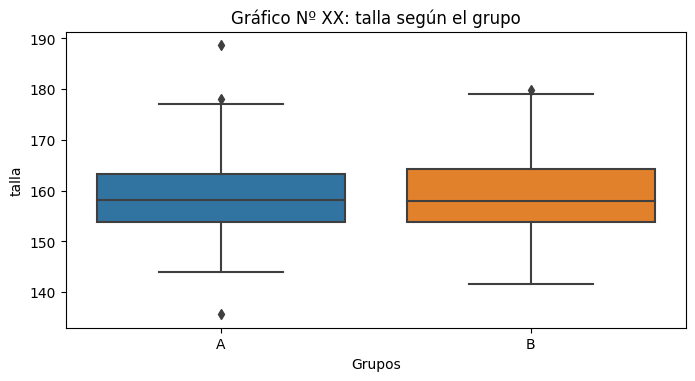

In [ ]:

import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 3.84))

g=sns.boxplot(
        x     = 'Grupos',  # variable cualitativa
        y     = 'talla',  # variable cuantitativa
        data  = data_nutricion_final,   # dataframe
        ax    = ax
    )

g.set_xlabel("Grupos")
g.set_ylabel("talla")
g.set_title("Gráfico Nº XX: talla según el grupo")

Text(0.5, 1.0, 'Gráfico Nº XX: edad según el grupo')

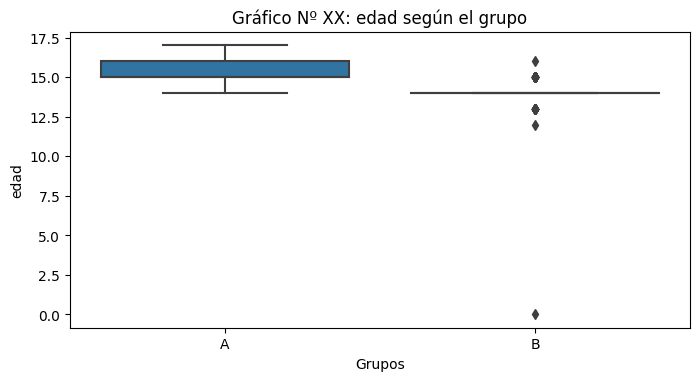

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 3.84))

g=sns.boxplot(
        x     = 'Grupos',  # variable cualitativa
        y     = 'edad',  # variable cuantitativa
        data  = data_nutricion_final,   # dataframe
        ax    = ax
    )

g.set_xlabel("Grupos")
g.set_ylabel("edad")
g.set_title("Gráfico Nº XX: edad según el grupo")

count    652.00
mean      14.76
std        1.05
min        0.00
25%       14.00
50%       15.00
75%       15.00
max       17.00
Name: edad, dtype: float64

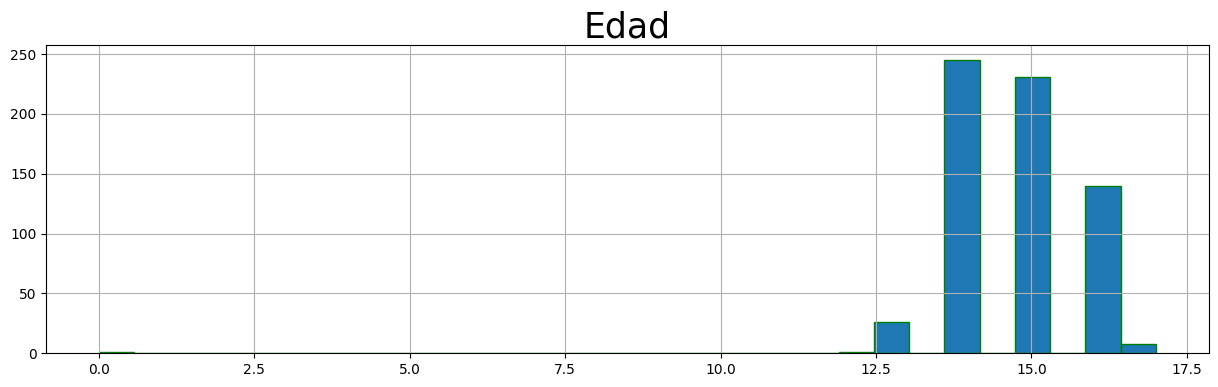

In [ ]:
# Histograma de edades
fig, ax = plt.subplots(figsize=(15,4))
data_nutricion_final["edad"].hist(bins=30, edgecolor="g")
ax.set_title("Edad", size=25)
data_nutricion_final["edad"].describe().round(2)

#2.3 Rango intercuartil

In [ ]:
def rango_intercuartil(x: pd.Series):
    #Obtenemos los "Quartiles"
    Q1 = x.quantile([.25]).values[0]
    Q3 = x.quantile([.75]).values[0]

    return Q1, Q3 - Q1, Q3

In [ ]:
#Obtenemos los Quartiles

d= var_nutricion_num_1.apply(rango_intercuartil, axis=0).T 
d.columns = ["Q1","RIC","Q3"]
d

Q1        RIC          Q3
talla                        153.800000   9.500000  163.300000
edad                          14.000000   1.000000   15.000000
peso_kg                       51.200000  10.250000   61.450000
circun_cuello                 30.700000   2.800000   33.500000
IMC                           20.306828   3.548253   23.855081
circun_cintura                70.000000   8.000000   78.000000
cadera                        85.000000   9.000000   94.000000
ind_cintura_cadera             0.795298   0.071369    0.866667
ind_cintura_estatura           0.439406   0.054204    0.493610
por_grasa_corporal            16.127803  13.945690   30.073493
masa_corporal_magra_kg        38.164889   9.899905   48.064794
pliegue_cutaneo_BICEPS         5.000000   7.000000   12.000000
pliegue_cutaneo_TRICEPS       11.000000   8.000000   19.000000
pliegue_cutaneo_ESCAPULAR     10.000000   8.000000   18.000000
pliegue_cutaneo_SUPRAILIACO   10.000000   9.000000   19.000000

#2.4 Varianza

In [ ]:
import numpy as np

var_nutricion_num_1.apply(np.var, axis=0).round(2)

talla                          53.45
edad                            1.10
peso_kg                        71.17
circun_cuello                   4.44
IMC                             9.10
circun_cintura                 46.68
cadera                         51.52
ind_cintura_cadera              0.00
ind_cintura_estatura            0.00
por_grasa_corporal             61.53
masa_corporal_magra_kg         47.65
pliegue_cutaneo_BICEPS         32.01
pliegue_cutaneo_TRICEPS        32.36
pliegue_cutaneo_ESCAPULAR      28.13
pliegue_cutaneo_SUPRAILIACO    35.39
dtype: float64

#2.5 Desviación estándar

In [ ]:
var_nutricion_num_1.apply(np.std, axis=0).round(2)

talla                          7.31
edad                           1.05
peso_kg                        8.44
circun_cuello                  2.11
IMC                            3.02
circun_cintura                 6.83
cadera                         7.18
ind_cintura_cadera             0.05
ind_cintura_estatura           0.05
por_grasa_corporal             7.84
masa_corporal_magra_kg         6.90
pliegue_cutaneo_BICEPS         5.66
pliegue_cutaneo_TRICEPS        5.69
pliegue_cutaneo_ESCAPULAR      5.30
pliegue_cutaneo_SUPRAILIACO    5.95
dtype: float64

#2.6 Coeficiente de variación

In [ ]:
def coeficiente_variacion(x):
  m = stats.mean(x)
  sd = np.std(x)
  return sd/m*100

In [ ]:
var_nutricion_num_1.apply(coeficiente_variacion, axis=0).round(2), "Porciento %"

(talla                           4.60
 edad                            7.10
 peso_kg                        14.83
 circun_cuello                   6.56
 IMC                            13.45
 circun_cintura                  9.17
 cadera                          7.99
 ind_cintura_cadera              6.51
 ind_cintura_estatura            9.75
 por_grasa_corporal             33.31
 masa_corporal_magra_kg         15.91
 pliegue_cutaneo_BICEPS         61.62
 pliegue_cutaneo_TRICEPS        36.35
 pliegue_cutaneo_ESCAPULAR      36.87
 pliegue_cutaneo_SUPRAILIACO    40.53
 dtype: float64,
 'Porciento %')

#2.7 Cuantiles

In [ ]:
# Obtendremos el cuartil 90 ---> 90%
Q = data_nutricion_final["talla"].quantile([.90])

print("Mínimo:", min(data_nutricion_final["talla"].round(2)))
print('Cuantil -->', round(Q, 2))
print("Máximo:", max(data_nutricion_final["talla"].round(2)))

Mínimo: 135.6
Cuantil --> 0.9    169.16
Name: talla, dtype: float64
Máximo: 188.6


#2.8 Curtosis

In [ ]:
from scipy.stats import kurtosis

def kurtosis_data(x):
  curtosis =  kurtosis(x, fisher=True)

  if curtosis >0:
    return ('Es Leptocúrtica-->', round(curtosis,2 ))
  elif curtosis ==0: # 0.03
    return  ('Es Mesocúrtica-->', round(curtosis,2 ))
  else:
    return  ('Es Platicúrtica-->', round(curtosis,2 ))

In [ ]:
var_nutricion_num_1.apply(kurtosis_data, axis=0).T

0      1
talla                        Es Leptocúrtica-->   0.08
edad                         Es Leptocúrtica-->  58.44
peso_kg                      Es Leptocúrtica-->   1.42
circun_cuello                Es Leptocúrtica-->   0.34
IMC                          Es Leptocúrtica-->   1.95
circun_cintura               Es Leptocúrtica-->   1.64
cadera                       Es Leptocúrtica-->   1.27
ind_cintura_cadera           Es Leptocúrtica-->   0.41
ind_cintura_estatura         Es Leptocúrtica-->   1.81
por_grasa_corporal           Es Platicúrtica-->  -1.11
masa_corporal_magra_kg       Es Leptocúrtica-->   0.42
pliegue_cutaneo_BICEPS       Es Leptocúrtica-->  62.17
pliegue_cutaneo_TRICEPS      Es Leptocúrtica-->   0.06
pliegue_cutaneo_ESCAPULAR    Es Leptocúrtica-->   0.72
pliegue_cutaneo_SUPRAILIACO  Es Platicúrtica-->  -0.31

#   C.     CORRELACIONES "R DE PEARSON" & "RHO DE SPEARMAN"

<Figure size 600x400 with 0 Axes>

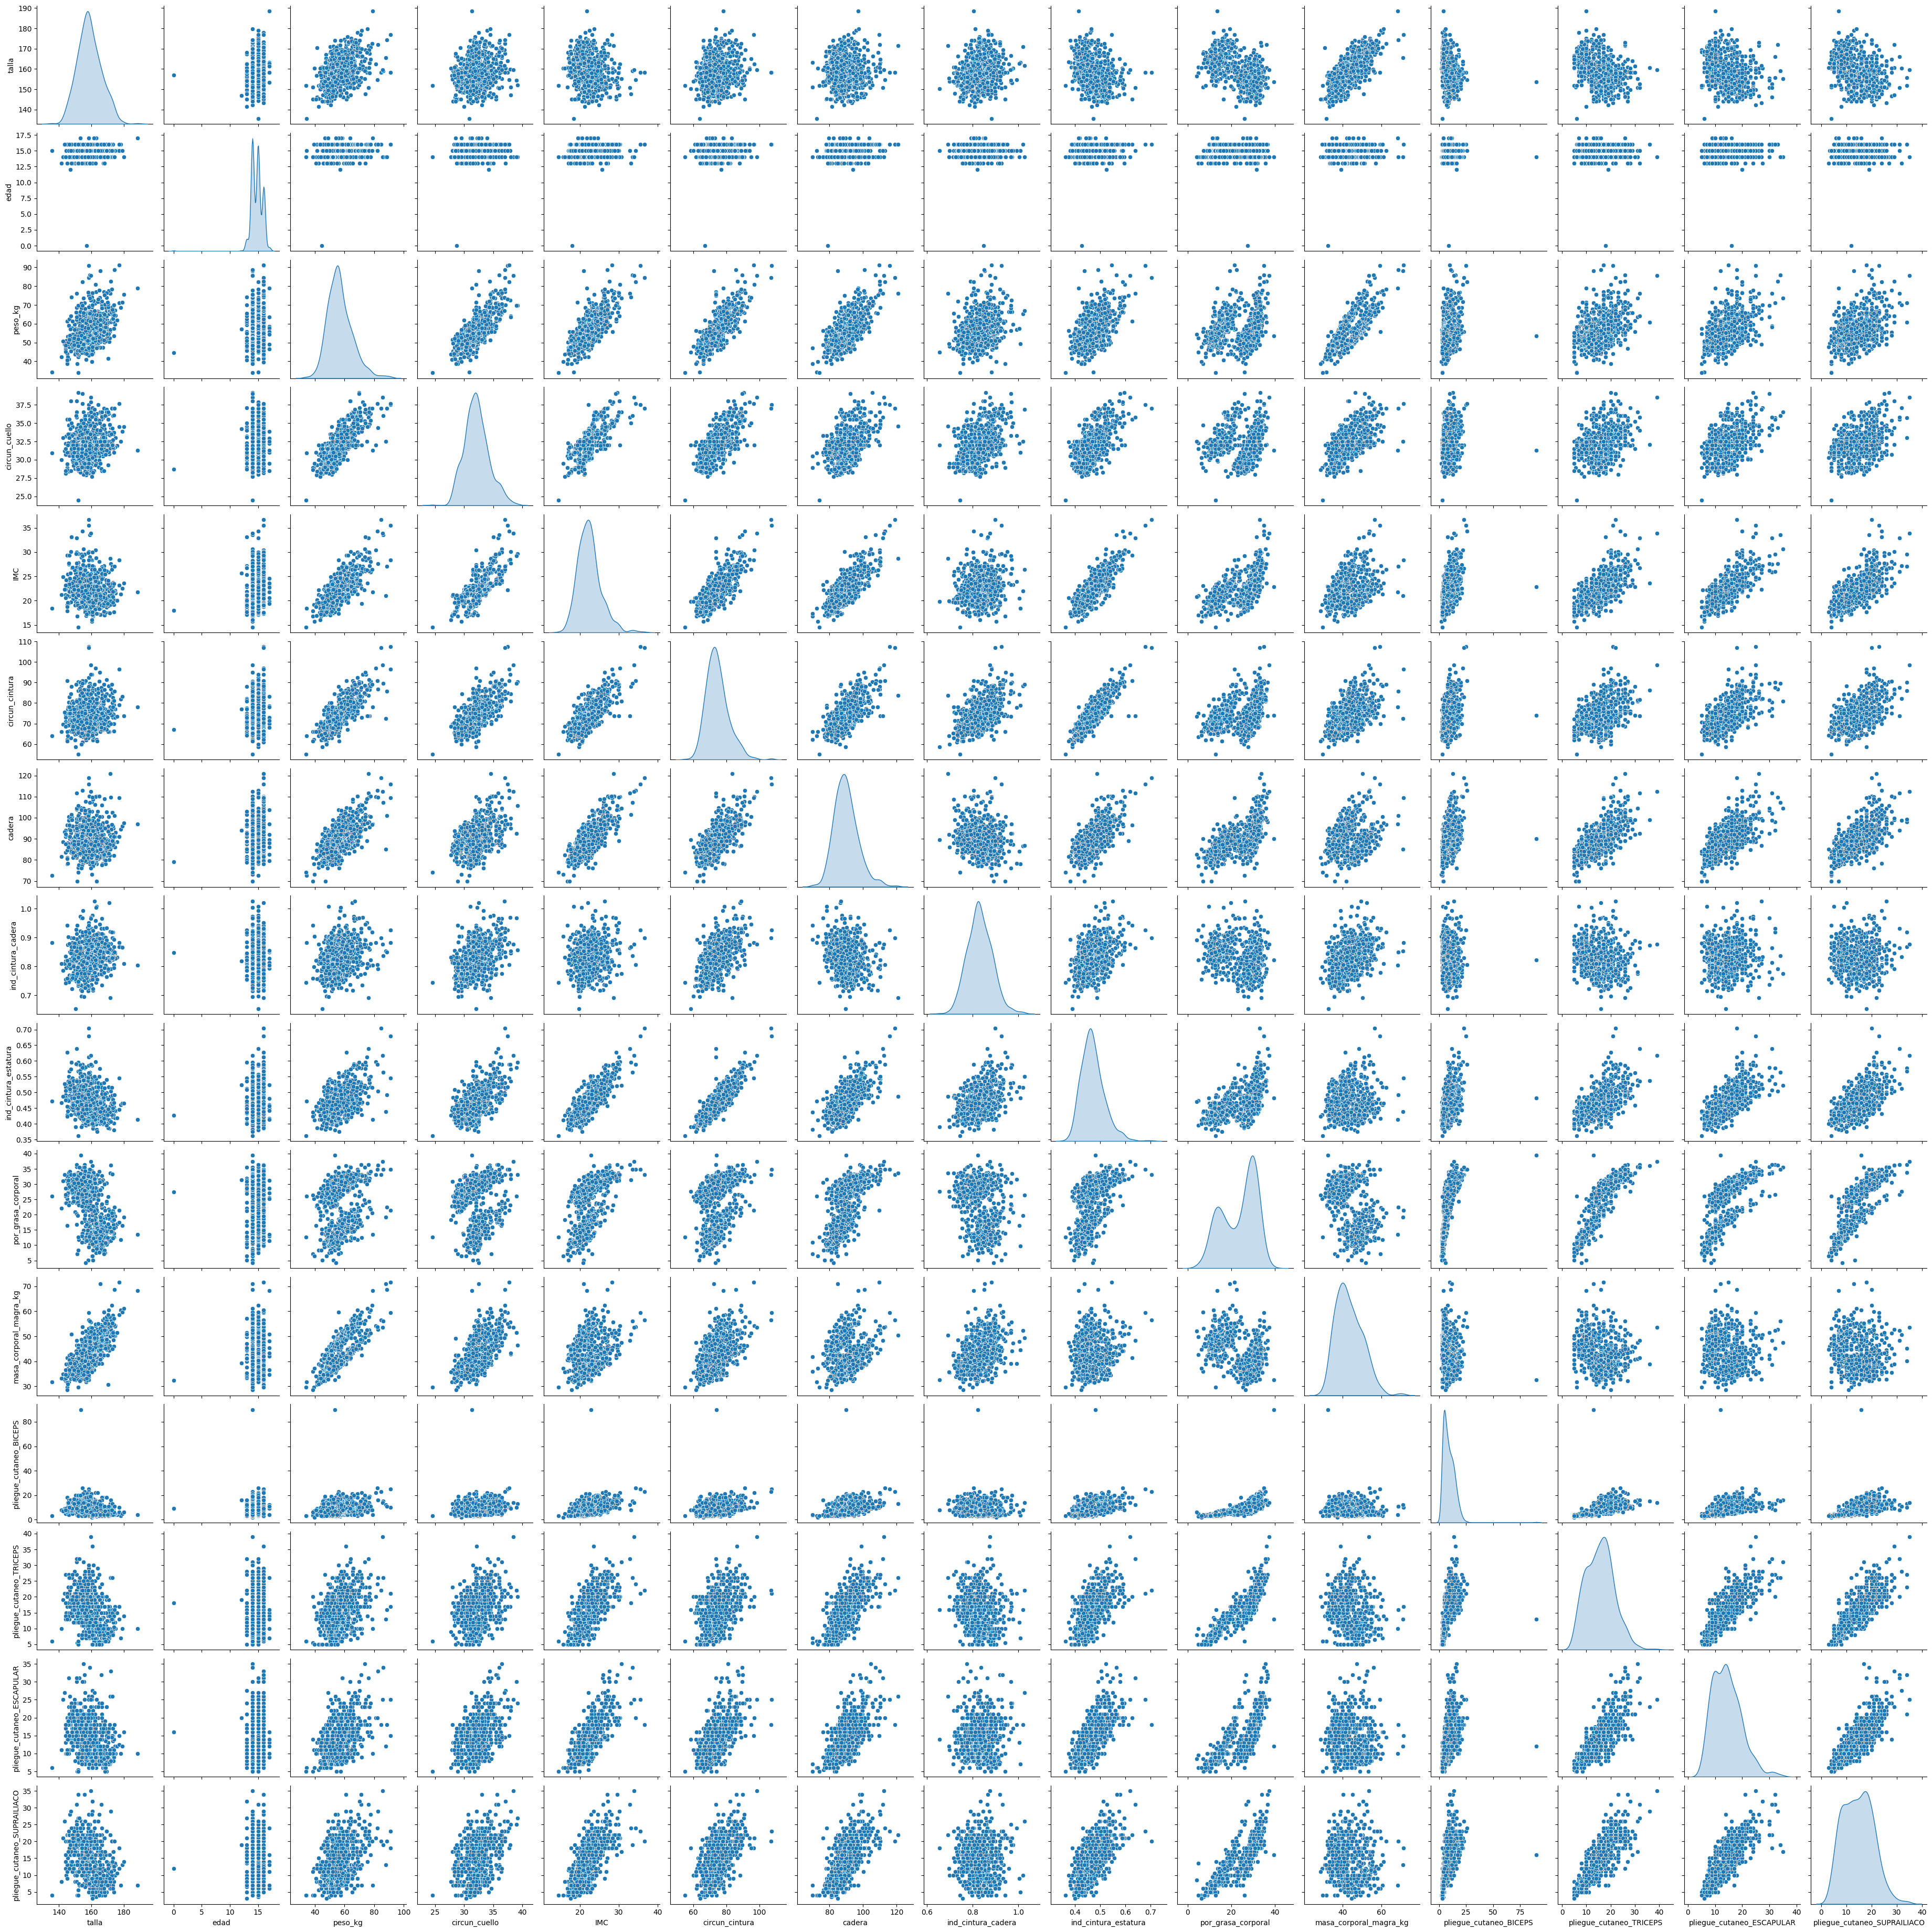

In [ ]:
# gráfico de puntos y curvas
plt.figure(figsize=(6,4))

sns.pairplot(var_nutricion_num_1, diag_kind='kde');

#Correlación R de SPEARSON

In [ ]:
correlacion = var_nutricion_num_1.corr(method='pearson').round(3)  # paramétrico

correlacion

talla   edad  peso_kg  circun_cuello    IMC  \
talla                        1.000  0.087    0.460          0.186 -0.150   
edad                         0.087  1.000    0.144          0.098  0.147   
peso_kg                      0.460  0.144    1.000          0.752  0.746   
circun_cuello                0.186  0.098    0.752          1.000  0.756   
IMC                         -0.150  0.147    0.746          0.756  1.000   
circun_cintura               0.161  0.156    0.774          0.690  0.766   
cadera                       0.022  0.174    0.689          0.493  0.780   
ind_cintura_cadera           0.203  0.014    0.277          0.391  0.160   
ind_cintura_estatura        -0.308  0.114    0.544          0.591  0.828   
por_grasa_corporal          -0.507  0.052    0.202          0.111  0.590   
masa_corporal_magra_kg       0.748  0.110    0.772          0.623  0.309   
pliegue_cutaneo_BICEPS      -0.307 -0.028    0.206          0.132  0.451   
pliegue_cutaneo_TRICEPS     -0.357  0.027    0.348          0.292  0.664   
pliegue_cutaneo_ESCAPULAR   -0.258  0.067    0.482          0.466  0.742   
pliegue_cutaneo_SUPRAILIACO -0.306  0.067    0.411          0.369  0.680   

                             circun_cintura  cadera  ind_cintura_cadera  \
talla                                 0.161   0.022               0.203   
edad                                  0.156   0.174               0.014   
peso_kg                               0.774   0.689               0.277   
circun_cuello                         0.690   0.493               0.391   
IMC                                   0.766   0.780               0.160   
circun_cintura                        1.000   0.697               0.528   
cadera                                0.697   1.000              -0.202   
ind_cintura_cadera                    0.528  -0.202               1.000   
ind_cintura_estatura                  0.857   0.669               0.412   
por_grasa_corporal                    0.345   0.618              -0.254   
masa_corporal_magra_kg                0.488   0.239               0.409   
pliegue_cutaneo_BICEPS                0.283   0.405              -0.091   
pliegue_cutaneo_TRICEPS               0.439   0.677              -0.189   
pliegue_cutaneo_ESCAPULAR             0.594   0.654               0.069   
pliegue_cutaneo_SUPRAILIACO           0.522   0.657              -0.048   

                             ind_cintura_estatura  por_grasa_corporal  \
talla                                      -0.308              -0.507   
edad                                        0.114               0.052   
peso_kg                                     0.544               0.202   
circun_cuello                               0.591               0.111   
IMC                                         0.828               0.590   
circun_cintura                              0.857               0.345   
cadera                                      0.669               0.618   
ind_cintura_cadera                          0.412              -0.254   
ind_cintura_estatura                        1.000               0.573   
por_grasa_corporal                          0.573               1.000   
masa_corporal_magra_kg                      0.127              -0.435   
pliegue_cutaneo_BICEPS                      0.419               0.704   
pliegue_cutaneo_TRICEPS                     0.596               0.876   
pliegue_cutaneo_ESCAPULAR                   0.700               0.754   
pliegue_cutaneo_SUPRAILIACO                 0.651               0.838   

                             masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  \
talla                                         0.748                  -0.307   
edad                                          0.110                  -0.028   
peso_kg                                       0.772                   0.206   
circun_cuello                                 0.623                   0.132   
IMC                                           0

Text(0.5, 1.0, 'Gráfico Nutrición: Correlación R de Spearson')

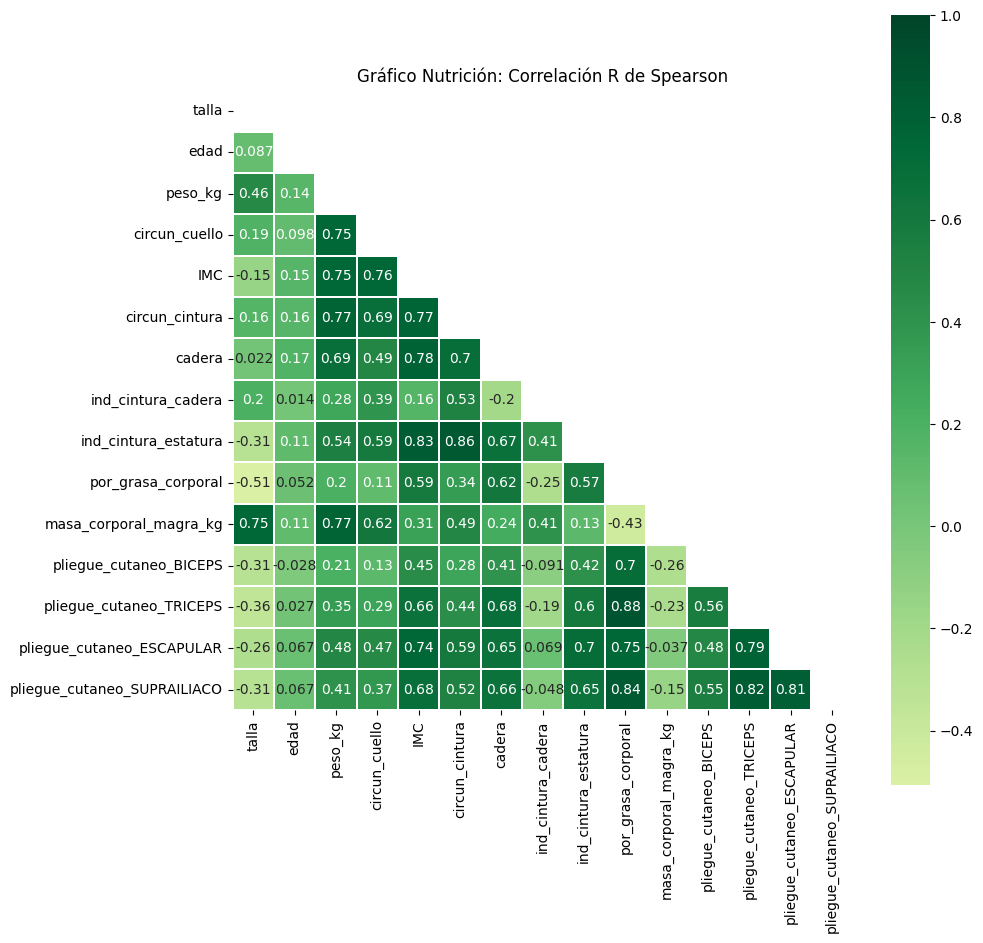

In [ ]:
mask = np.triu(np.ones_like(correlacion, dtype=bool )) #la máscara para el triángulo superior del gráfico
f, ax = plt.subplots(figsize = (10,10)) # la base para el gráfico
g = sns.heatmap(correlacion, mask = mask, cmap='YlGn', vmax=1, center = 0, 
            square = True, linewidths=.1, annot=True)
g.set_title("Gráfico Nutrición: Correlación R de Spearson")

#Correlación RHO de SPEARMAN

In [ ]:
Rho = var_nutricion_num_1.corr(method='spearman').round(3) # no paramétrico
Rho

talla   edad  peso_kg  circun_cuello    IMC  \
talla                        1.000  0.087    0.445          0.182 -0.186   
edad                         0.087  1.000    0.135          0.097  0.150   
peso_kg                      0.445  0.135    1.000          0.741  0.704   
circun_cuello                0.182  0.097    0.741          1.000  0.743   
IMC                         -0.186  0.150    0.704          0.743  1.000   
circun_cintura               0.149  0.150    0.761          0.678  0.732   
cadera                      -0.039  0.152    0.633          0.451  0.738   
ind_cintura_cadera           0.233  0.030    0.284          0.376  0.130   
ind_cintura_estatura        -0.348  0.100    0.473          0.549  0.791   
por_grasa_corporal          -0.497  0.066    0.243          0.172  0.647   
masa_corporal_magra_kg       0.740  0.087    0.746          0.616  0.253   
pliegue_cutaneo_BICEPS      -0.421 -0.018    0.199          0.128  0.541   
pliegue_cutaneo_TRICEPS     -0.405  0.043    0.314          0.257  0.672   
pliegue_cutaneo_ESCAPULAR   -0.305  0.090    0.452          0.420  0.755   
pliegue_cutaneo_SUPRAILIACO -0.345  0.067    0.380          0.317  0.697   

                             circun_cintura  cadera  ind_cintura_cadera  \
talla                                 0.149  -0.039               0.233   
edad                                  0.150   0.152               0.030   
peso_kg                               0.761   0.633               0.284   
circun_cuello                         0.678   0.451               0.376   
IMC                                   0.732   0.738               0.130   
circun_cintura                        1.000   0.668               0.509   
cadera                                0.668   1.000              -0.216   
ind_cintura_cadera                    0.509  -0.216               1.000   
ind_cintura_estatura                  0.829   0.641               0.353   
por_grasa_corporal                    0.379   0.652              -0.239   
masa_corporal_magra_kg                0.472   0.165               0.445   
pliegue_cutaneo_BICEPS                0.300   0.510              -0.169   
pliegue_cutaneo_TRICEPS               0.411   0.673              -0.234   
pliegue_cutaneo_ESCAPULAR             0.592   0.652               0.039   
pliegue_cutaneo_SUPRAILIACO           0.495   0.670              -0.098   

                             ind_cintura_estatura  por_grasa_corporal  \
talla                                      -0.348              -0.497   
edad                                        0.100               0.066   
peso_kg                                     0.473               0.243   
circun_cuello                               0.549               0.172   
IMC                                         0.791               0.647   
circun_cintura                              0.829               0.379   
cadera                                      0.641               0.652   
ind_cintura_cadera                          0.353              -0.239   
ind_cintura_estatura                        1.000               0.619   
por_grasa_corporal                          0.619               1.000   
masa_corporal_magra_kg                      0.063              -0.398   
pliegue_cutaneo_BICEPS                      0.507               0.863   
pliegue_cutaneo_TRICEPS                     0.604               0.909   
pliegue_cutaneo_ESCAPULAR                   0.727               0.824   
pliegue_cutaneo_SUPRAILIACO                 0.663               0.877   

                             masa_corporal_magra_kg  pliegue_cutaneo_BICEPS  \
talla                                         0.740                  -0.421   
edad                                          0.087                  -0.018   
peso_kg                                       0.746                   0.199   
circun_cuello                                 0.616                   0.128   
IMC                                           0

Text(0.5, 1.0, 'Gráfico Nutrición: Correlación Rho de Spearman')

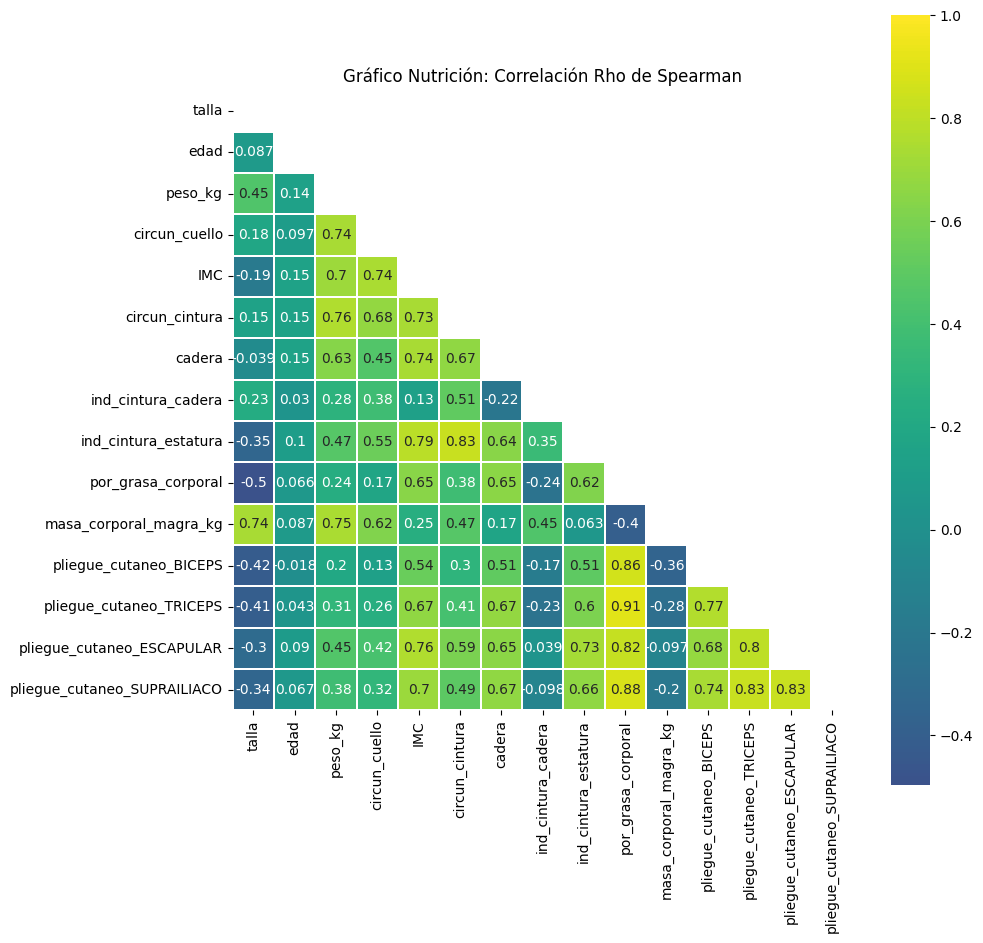

In [ ]:
mask = np.triu(np.ones_like(Rho, dtype=bool )) #la máscara para el triángulo superior del gráfico
f, ax = plt.subplots(figsize = (10,10)) # la base para el gráfico
g = sns.heatmap(Rho, mask = mask, cmap='viridis', vmax=1, center = 0, 
            square = True, linewidths=.1, annot=True)

g.set_title("Gráfico Nutrición: Correlación Rho de Spearman")